# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sun May 15 17:44:20 2022


In [5]:
#import os
import re
import glob

from collections import namedtuple

## 1D 

In [6]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.)
df

,dtime,x,y,energy
0,0.713787,-0.027321,0.492934,38.706831
1,0.885357,0.013657,0.430229,35.101542
2,0.287481,-0.024376,0.268382,36.625901
3,0.858711,-0.307721,-0.388755,37.961475
4,0.334819,0.200932,-0.221630,42.106758
...,...,...,...,...
78464,0.508104,-0.111547,0.276119,43.457316
78465,0.684364,-0.227328,-0.216073,40.355622
78466,0.128117,-0.258142,-0.092619,39.776281
78467,0.424142,-0.444814,-0.001310,38.020343


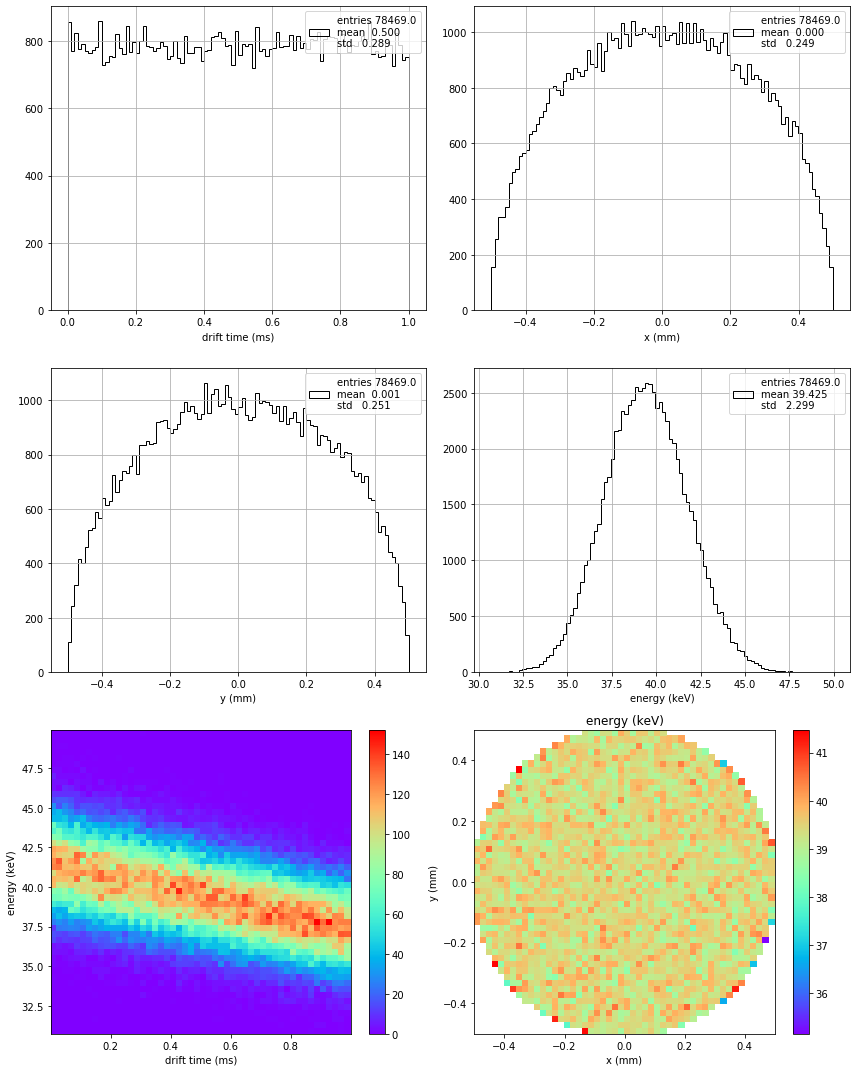

In [7]:
krana.plot_data(df, 50)

In [8]:
coors  = (df.dtime.values,)
energy = df.energy.values
bins   = 100
krmap, residuals  = prof.profile(coors, energy, bins)

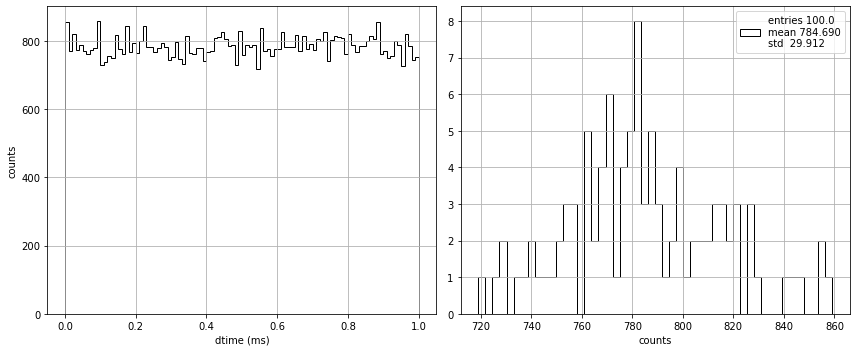

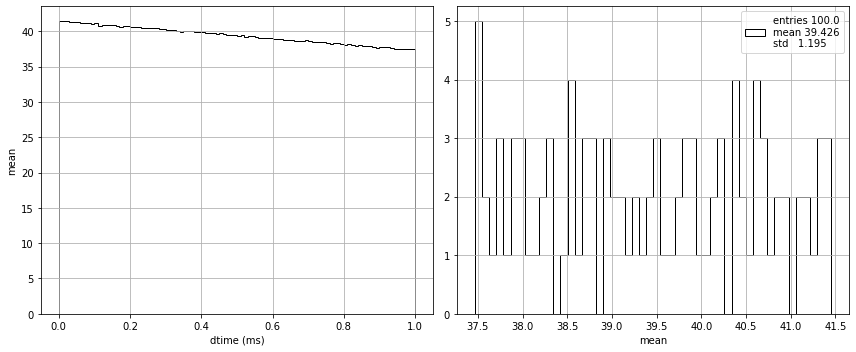

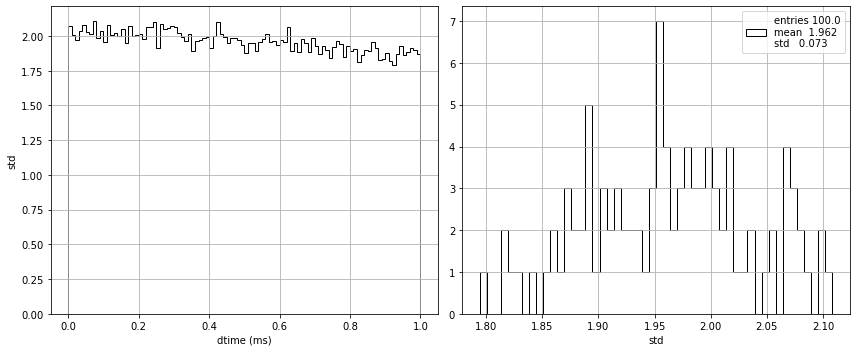

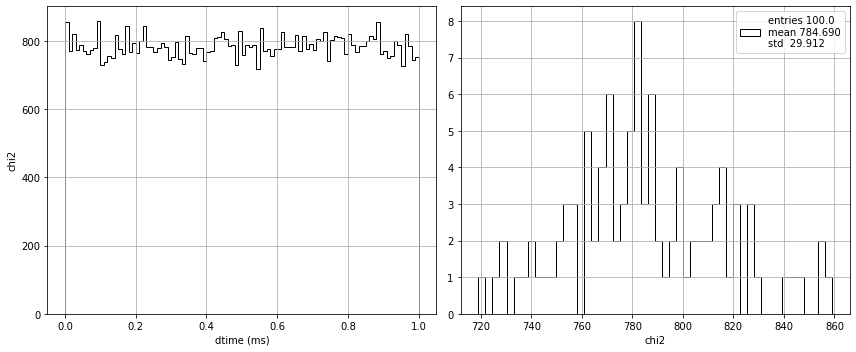

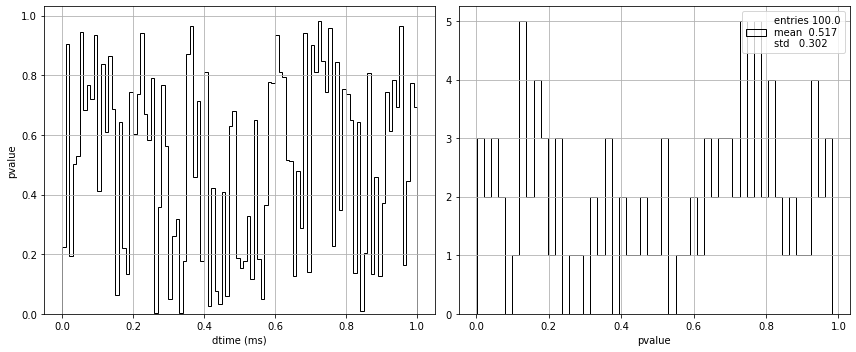

In [9]:
prof.plot_profile(krmap, coornames = ('dtime (ms)',))

### correction

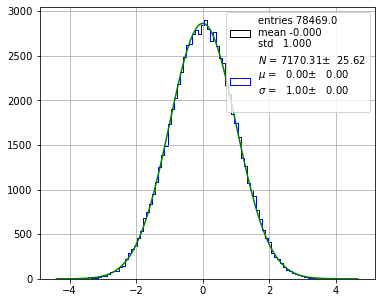

In [10]:
pltext.canvas(1, 1);
pltext.hist(residuals, 100);
pltext.hfit(residuals, 100, fun = 'gaus');

In [11]:
corenergy = prof.profile_scale(coors, energy, krmap, 41.5)

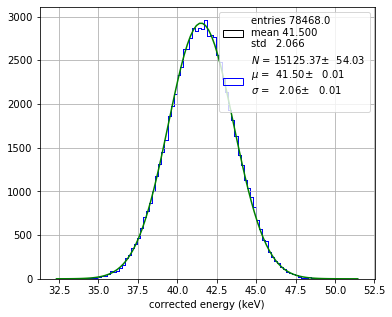

In [12]:
pltext.canvas(1, 1)
xsel = ~np.isnan(corenergy)
pltext.hist(corenergy[xsel], 100);
pltext.hfit(corenergy[xsel], 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)');

In [13]:
prof.save(krmap, 'test', 'test.h5')

In [14]:
kk = prof.load('test', 'test.h5')

('counts', 'mean', 'std', 'chi2', 'pvalue', 'success')


### Validate correction

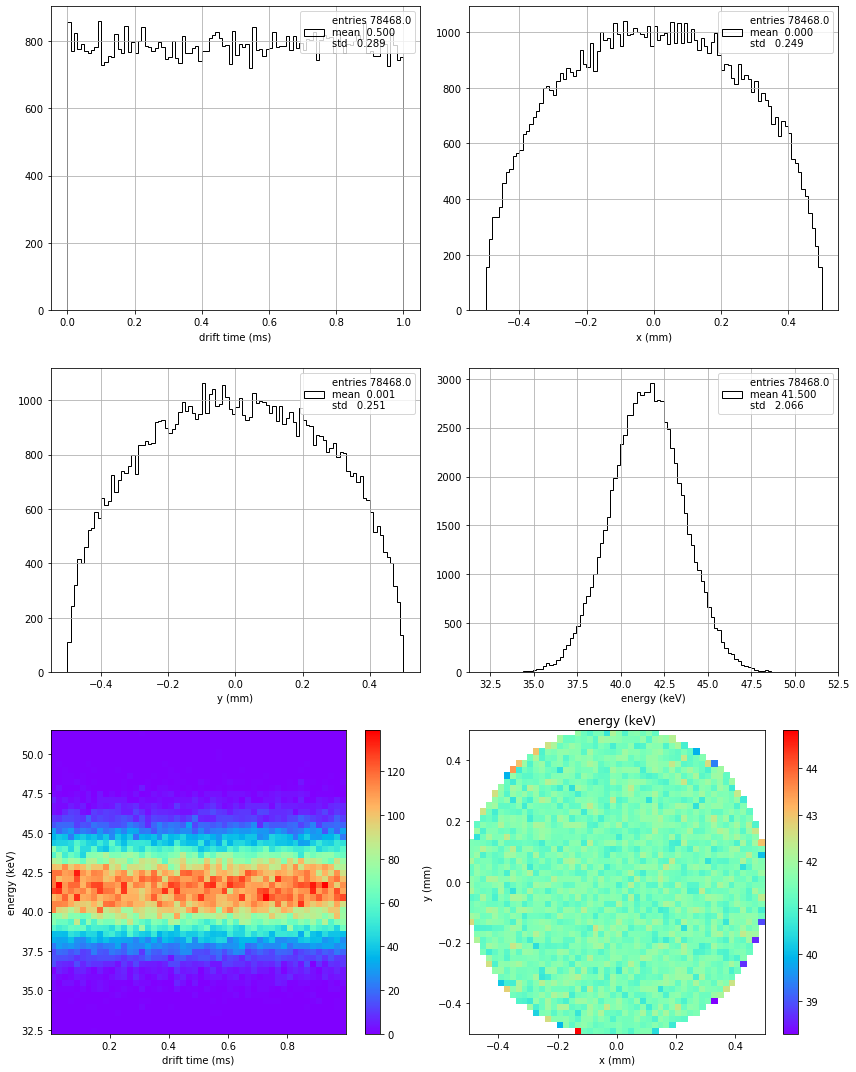

In [15]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf[xsel], 50)

## 2D

In [16]:
df = krana.generate_kr_toy(100000, tau = 0., beta = 0.2)
df

,dtime,x,y,energy
0,0.327144,-0.402467,0.041908,38.044471
1,0.700725,0.015299,-0.058237,39.278395
2,0.618065,0.329842,-0.371703,32.117722
3,0.359575,0.393232,0.306920,33.751321
4,0.373712,0.062577,0.115566,42.287941
...,...,...,...,...
78500,0.218926,-0.243507,0.201306,39.248944
78501,0.149576,0.283772,0.175417,40.110584
78502,0.474128,-0.098186,-0.164445,40.485025
78503,0.578051,-0.346607,-0.228435,35.971520


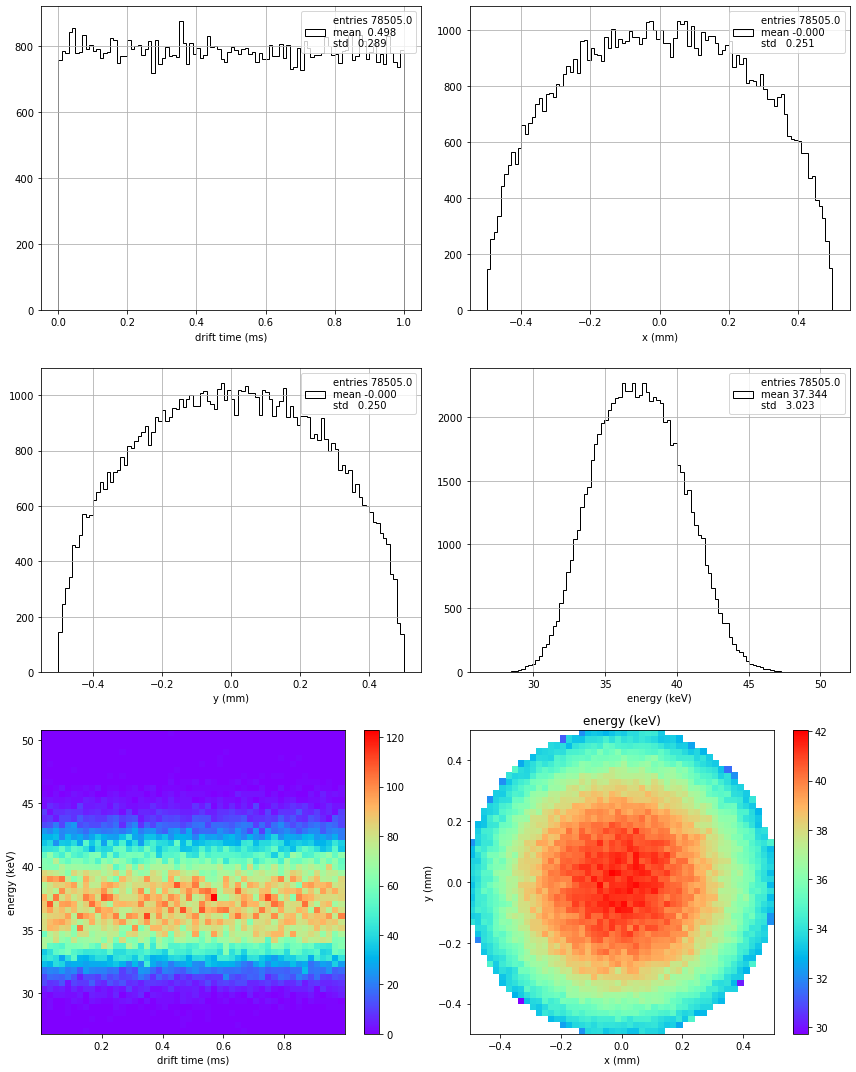

In [17]:
krana.plot_data(df, 50)

### kr  map

In [18]:
coors  = (df.x.values, df.y.values)
energy = df.energy.values
bins   = 40, 40
krmap, residuals  = prof.profile(coors, energy, bins)

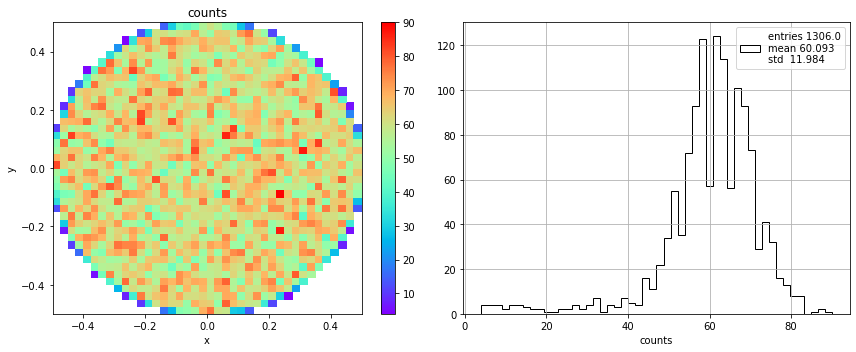

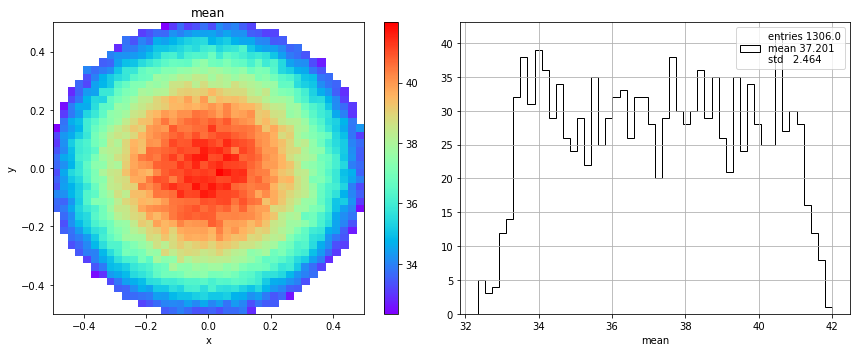

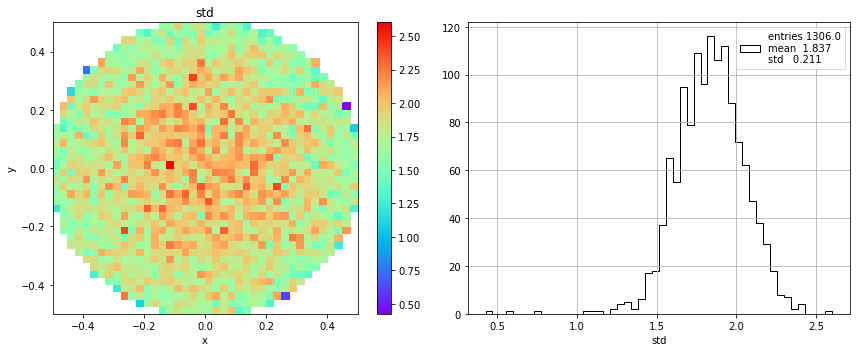

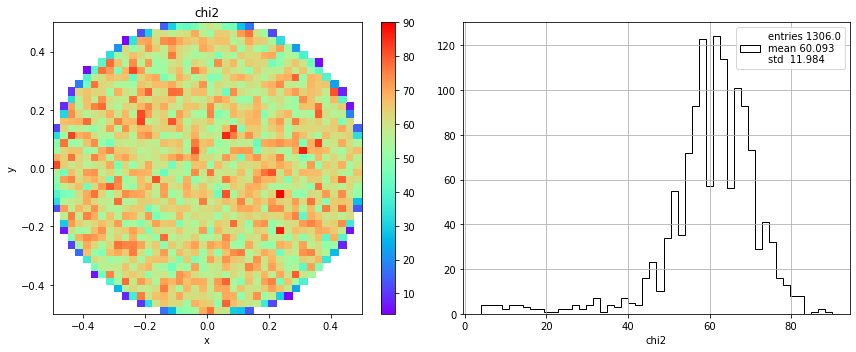

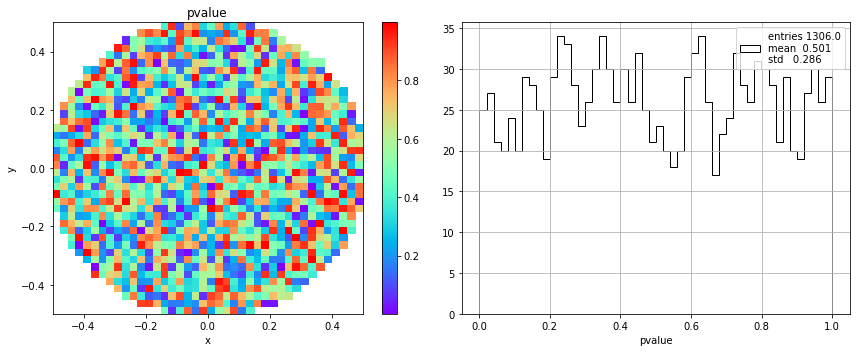

In [19]:
prof.plot_profile(krmap)

### Correction

In [20]:
corenergy    = prof.profile_scale(coors, energy, krmap, 41.5)

Text(0.5, 0, 'corrected energy (keV)')

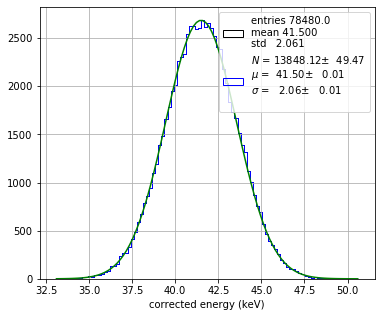

In [21]:
xsel = ~np.isnan(corenergy)
pltext.canvas(1, 1)
pltext.hist(corenergy[xsel], 100);
pltext.hfit(corenergy[xsel], 100, fun = 'gaus');
plt.xlabel('corrected energy (keV)')

### Validate correction

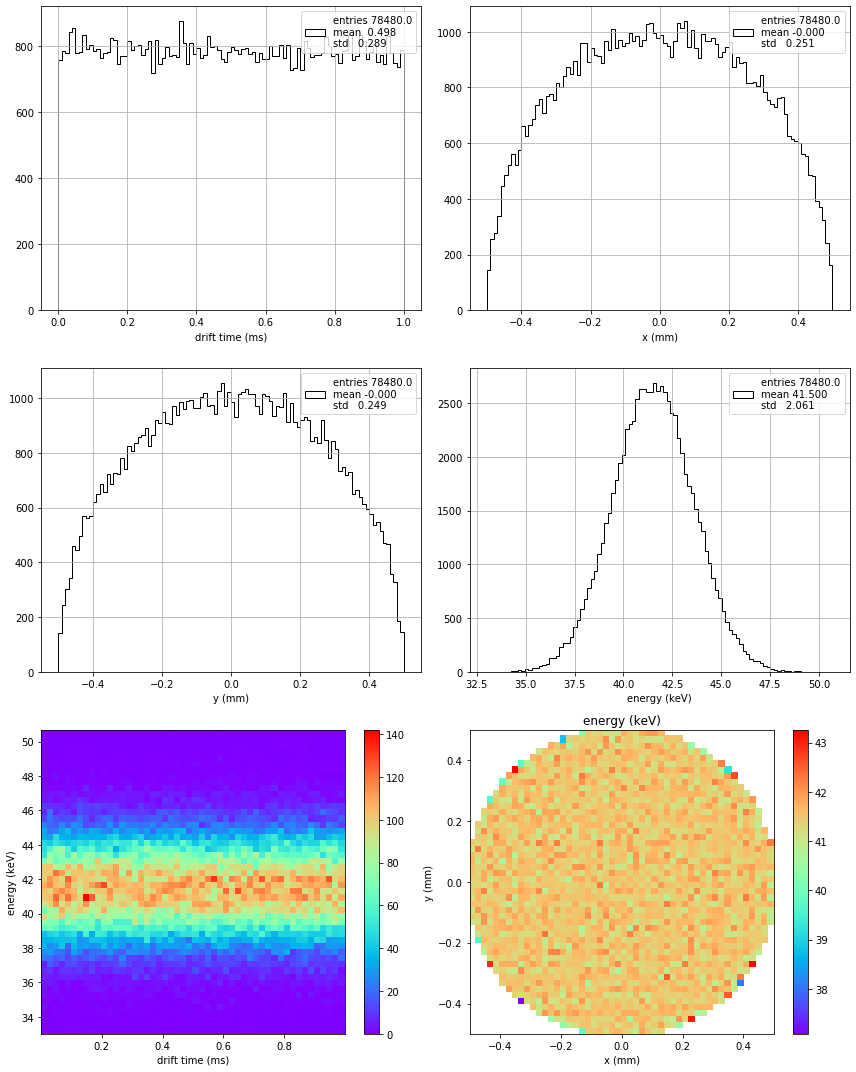

In [22]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf[xsel], 50)

## 3D

In [23]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2)
df

,dtime,x,y,energy
0,0.412358,0.237639,-0.050669,38.318480
1,0.284282,0.038090,0.129822,40.492481
2,0.593875,-0.137439,0.391674,30.688596
3,0.488514,0.394684,-0.240605,33.360450
4,0.870010,0.351275,-0.277304,31.030896
...,...,...,...,...
78673,0.653049,0.244773,0.333858,34.805227
78674,0.949135,-0.298241,-0.055548,32.994664
78675,0.549327,-0.096081,0.389761,35.431345
78676,0.285511,-0.184808,0.299339,40.632041


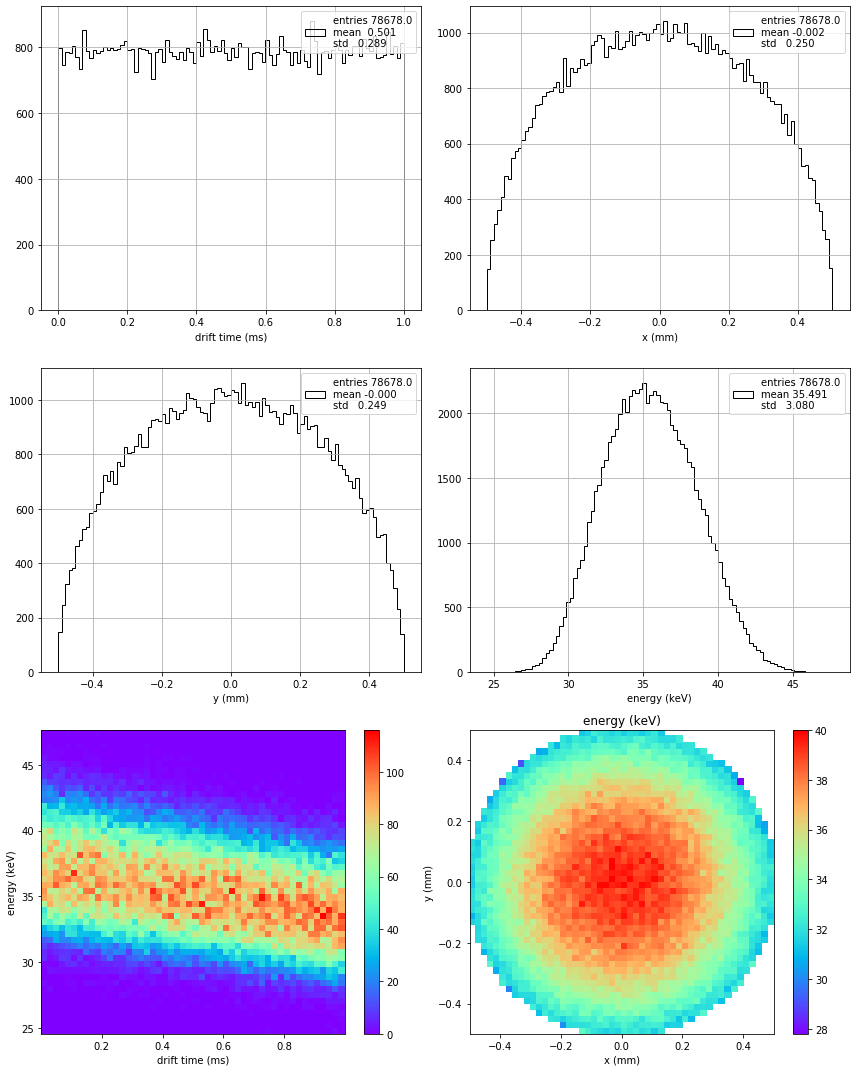

In [24]:
krana.plot_data(df, 50)

### Kr map

In [25]:
coors  = (df.x.values, df.y.values, df.dtime.values)
energy = df.energy.values
bins   = 20, 20, 4
krmap , residuals = prof.profile(coors, energy, bins)

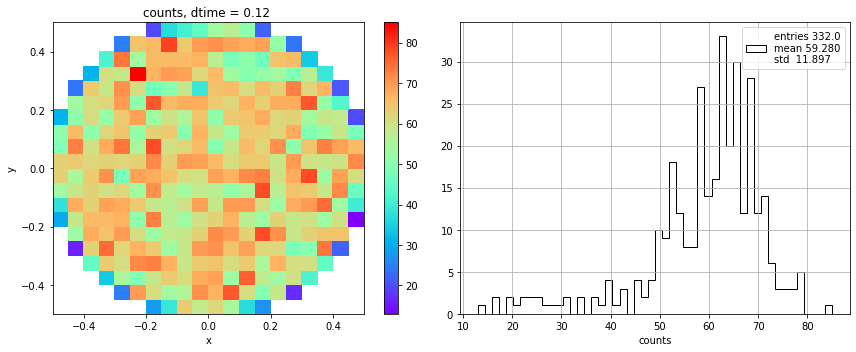

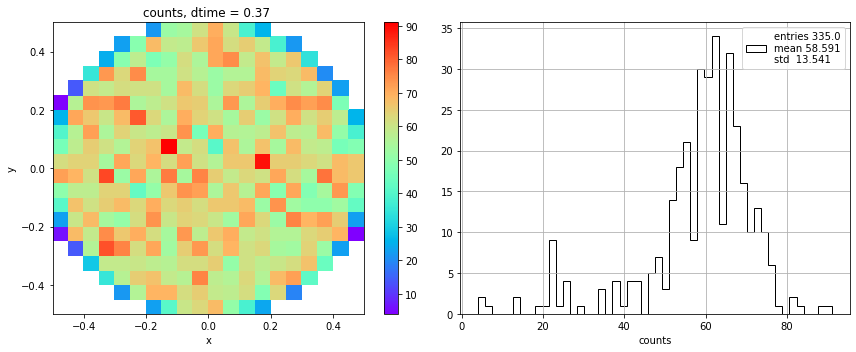

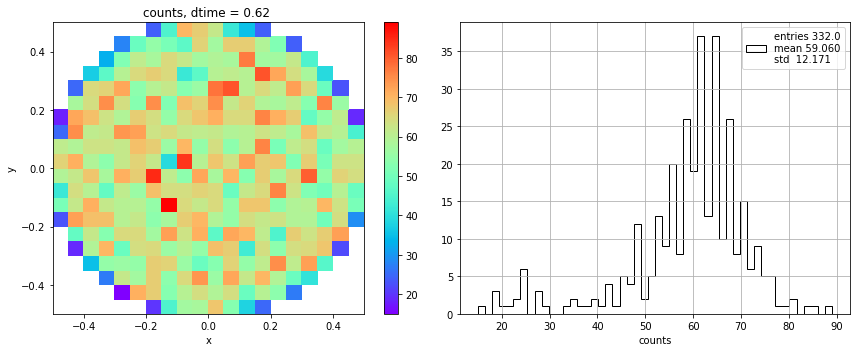

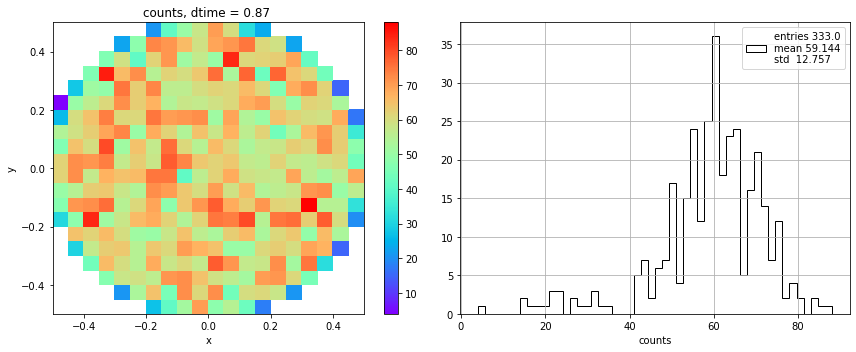

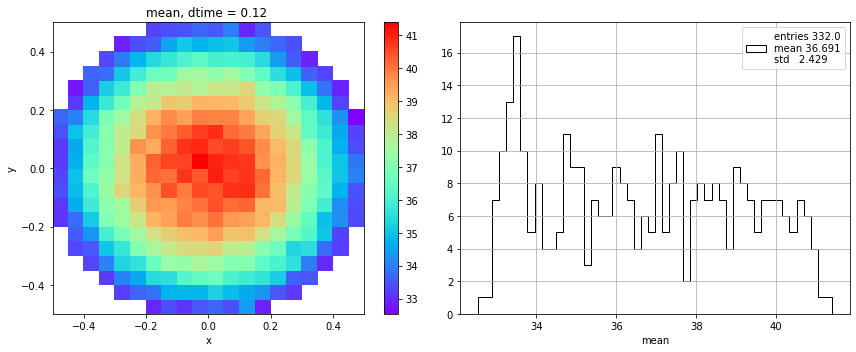

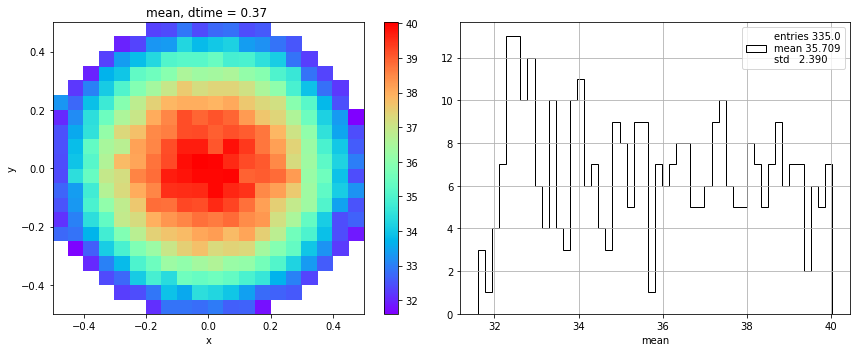

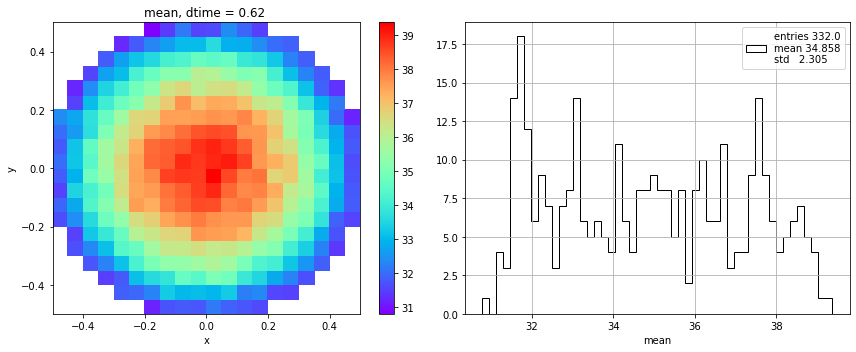

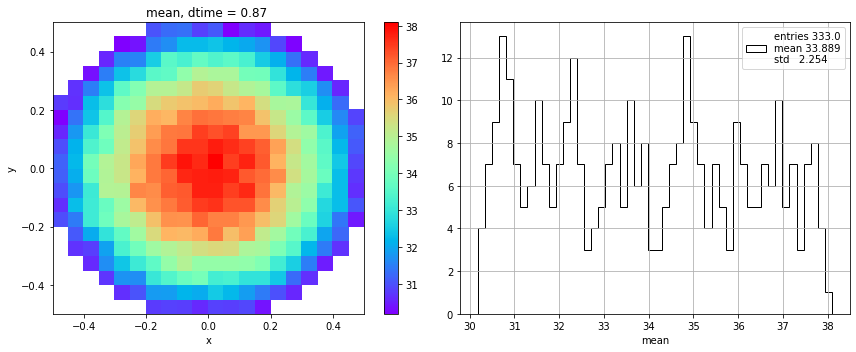

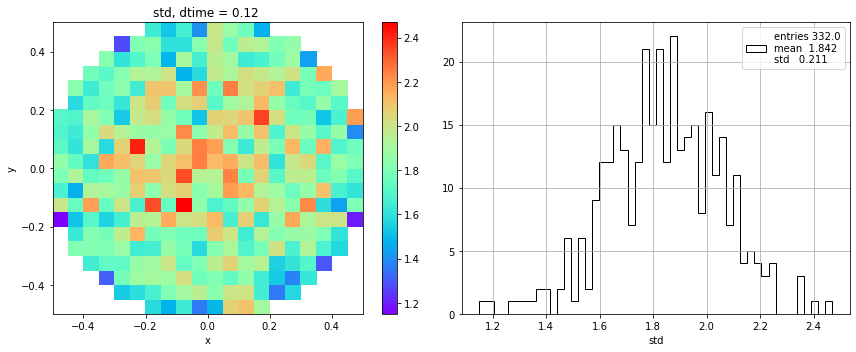

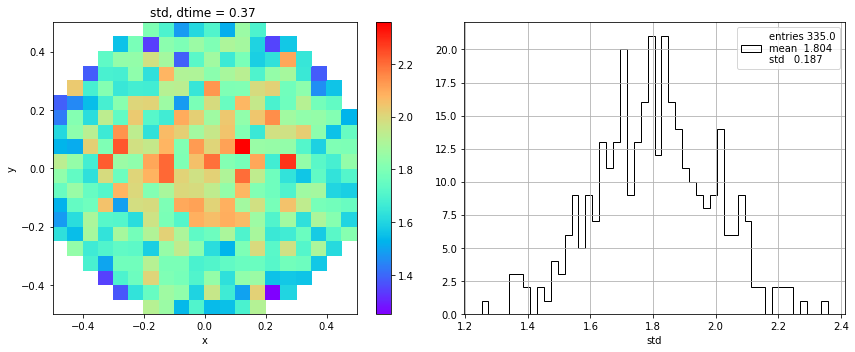

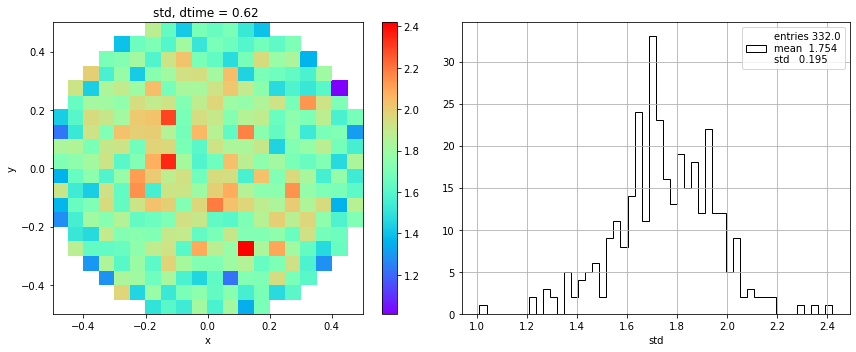

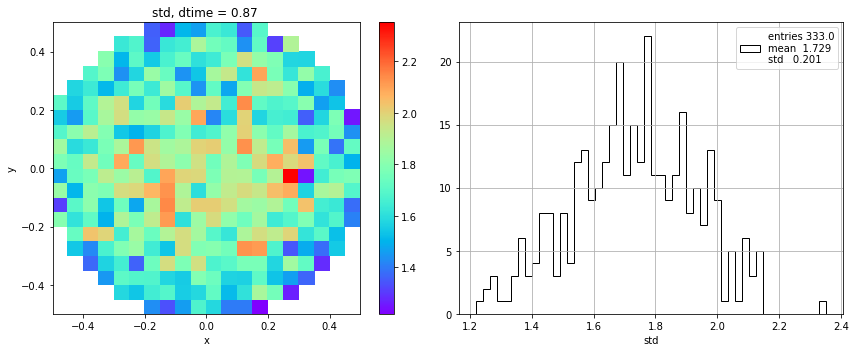

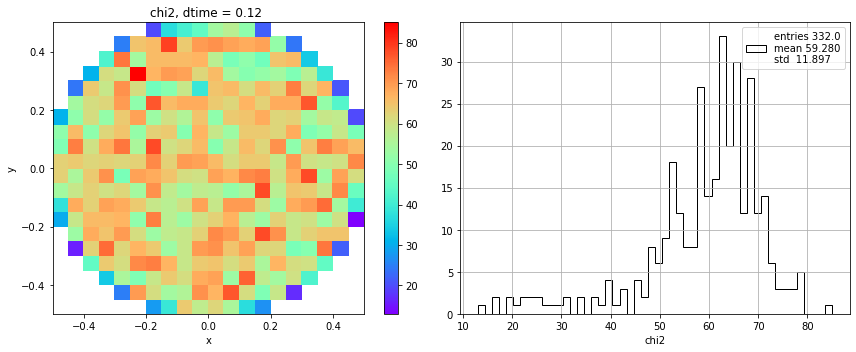

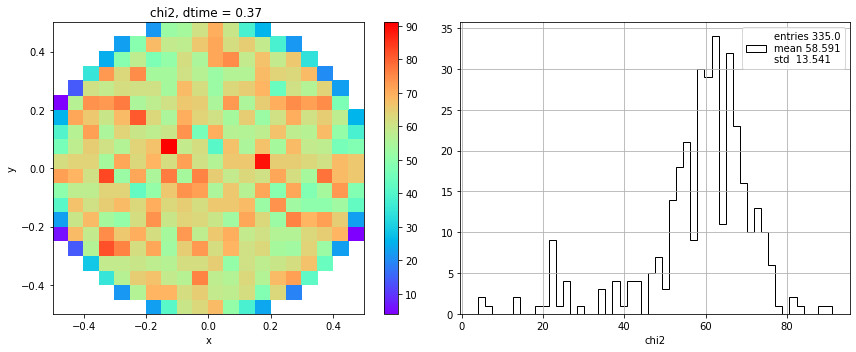

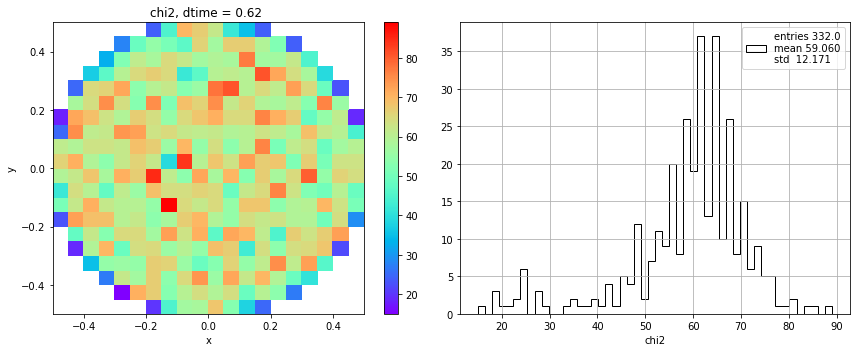

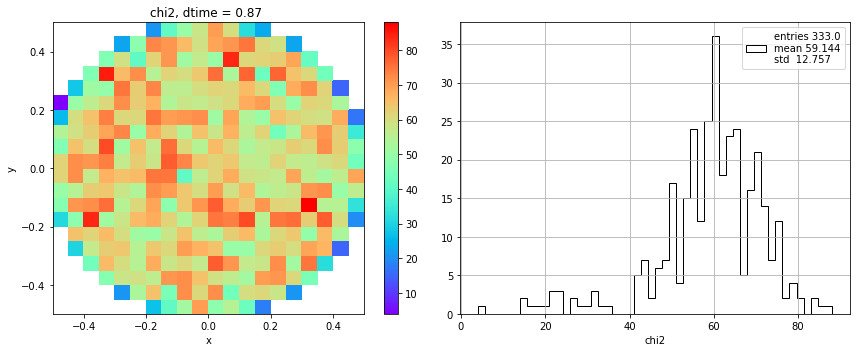

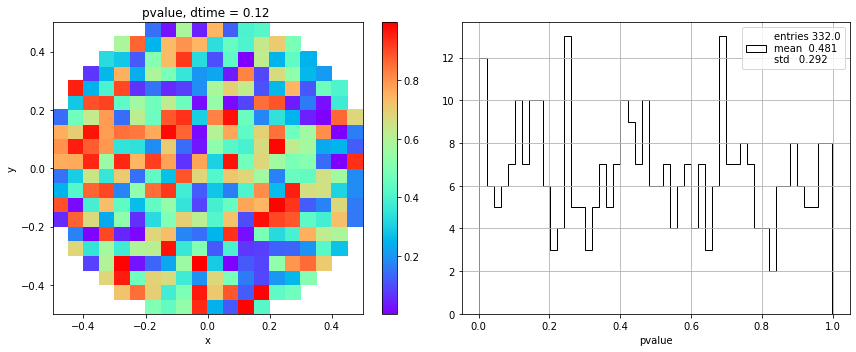

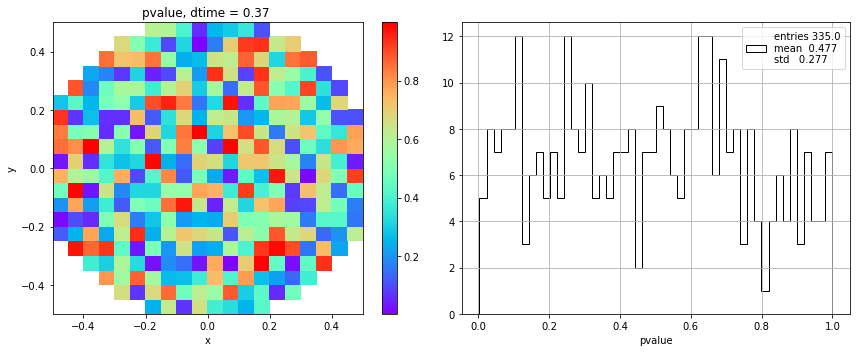

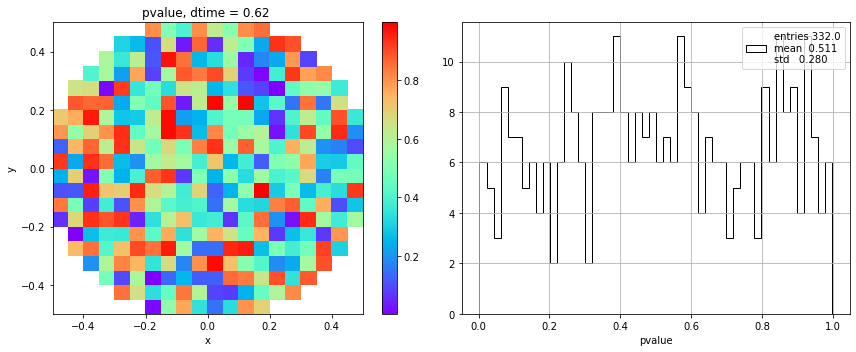

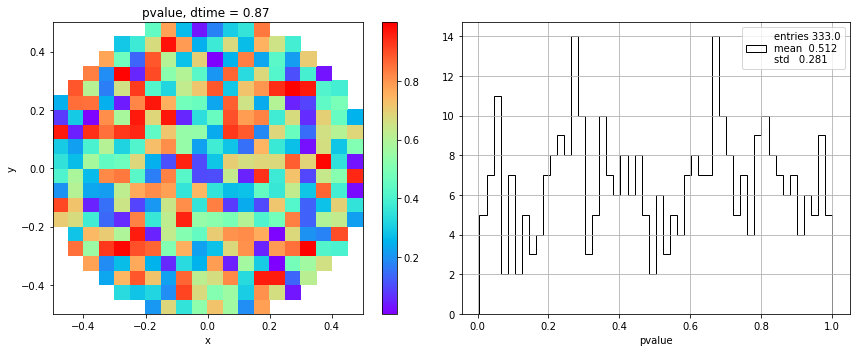

In [26]:
prof.plot_profile(krmap, coornames = ('x', 'y', 'dtime'));

### corrections

In [27]:
corenergy    = prof.profile_scale(coors, energy, krmap, 41.5)

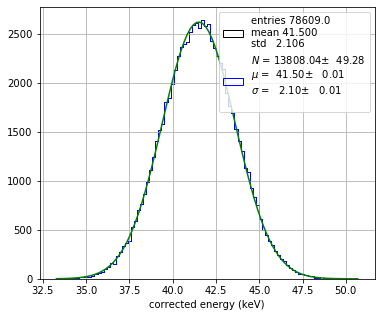

In [28]:
pltext.canvas(1, 1)
xsel = ~np.isnan(corenergy)
pltext.hist(corenergy[xsel], 100);
pltext.hfit(corenergy[xsel], 100, fun = 'gaus')
plt.xlabel('corrected energy (keV)');

### Validate correction

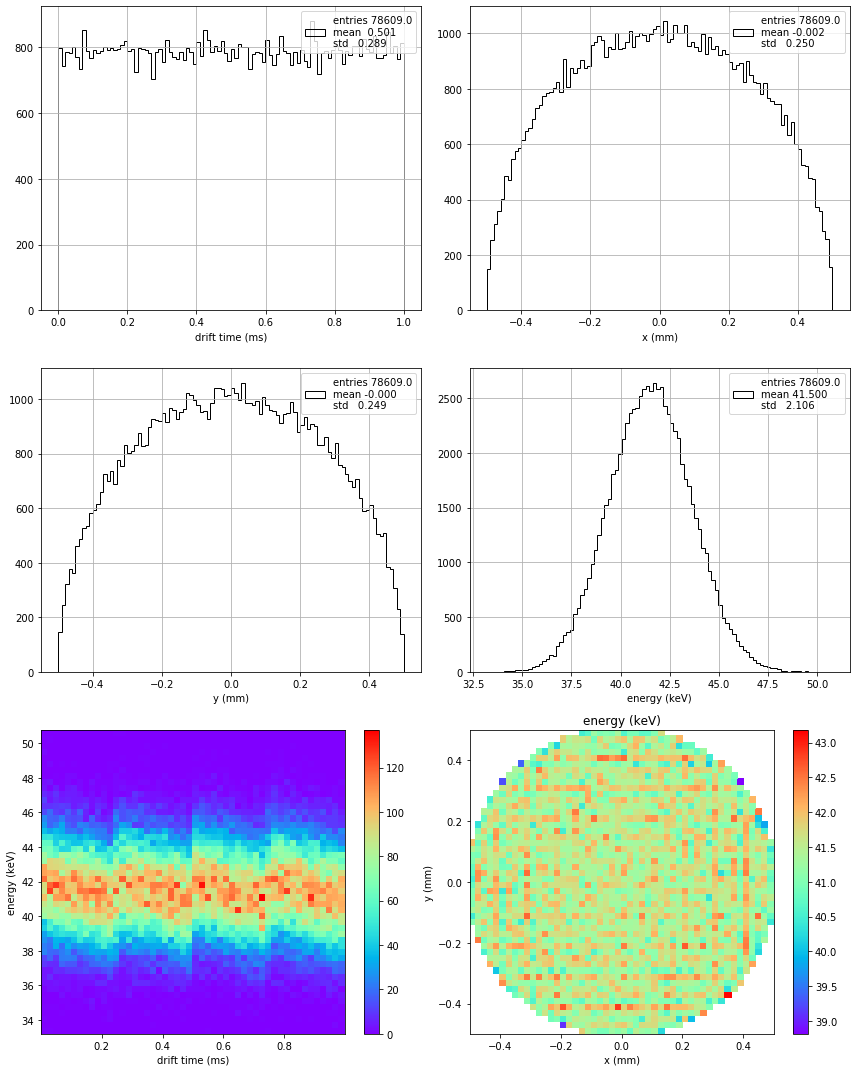

In [29]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
krana.plot_data(xdf[xsel], 50);